<a href="https://colab.research.google.com/github/arinashiko/SOH-prediction-using-ML/blob/main/clear_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Очистка данных по каждой фиче

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr, spearmanr
from scipy import stats

<ipython-input-1-d439956f1c2a>:6: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr
<ipython-input-1-d439956f1c2a>:6: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr, spearmanr


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Это датасеты, которые уже отфильтрованы по Capacity, вида: одна строка - один цикл работы
filenames_CS = ['CS2_33_features_one_row_one_cycle.csv', 'CS2_34_features_one_row_one_cycle.csv', 'CS2_35_features_one_row_one_cycle.csv', 'CS2_36_features_one_row_one_cycle.csv', 'CS2_37_features_one_row_one_cycle.csv', 'CS2_38_features_one_row_one_cycle.csv']
filenames_CX = ['CX2_33_features_one_row_one_cycle.csv', 'CX2_35_features_one_row_one_cycle.csv', 'CX2_36_features_one_row_one_cycle.csv', 'CX2_37_features_one_row_one_cycle.csv', 'CX2_38_features_one_row_one_cycle.csv']

filenames_folder= '/content/drive/MyDrive/Battery_project/transformed_data'

In [ ]:
def build_polynomial(X, y, order):
  # Build polynomial using poly1d
  poly_fit = np.poly1d(np.polyfit(X.tolist(), y.tolist(), order)) # порядок полиномина подбирается вручную
  plt.plot(X, poly_fit(X), c='r', markersize=5, label='polynomial')
  return poly_fit

In [ ]:
dict = {'Cycle_Index': 'Индекс цикла', 'Charge_Time_s': 'Время заряда (с)', 'Slope': 'Наклон напряжения', 'Kurtosis': 'Эксцесс напряжения', 'Skewness': 'Асимметрия напряжения',\
        'Frechet_distance': 'Расстояние Фреше', 'Hausdorff_distance': 'Расстояние Хаусдорффа', 'Energy_Wh' : 'Энергия (Вт*ч)', 'Capacity_Ah': 'Емкость (А*ч)',\
        'Internal_Resistance(Ohm)': 'Внутренее сопротивление (Ом)', 'dV/dt(V/s)': 'Производная напряжения (В/с)', 'Voltage(V)': 'Напряжение (В)', 'Current(A)': 'Ток (А)',  'Signal_mean': 'Средний ток (А)'}

In [ ]:
def remove_outliers(data: pd.DataFrame, column: str, order: int, threshold: float) -> pd.DataFrame:
  plt.figure(figsize=(5, 5))

  polynomial_fun = build_polynomial(data.index, data[column], order) # полином, описывающий функцию фичи (все точки)
  Y_polynomial = polynomial_fun(data.index)
  col_index = data.columns.get_loc(column)

  outliers = np.abs(data[column] - Y_polynomial[data.index]) > threshold

  plt.scatter(data.index, data[column], color='blue', label='y') # все точки
  plt.xlabel('Индекс цикла')
  plt.ylabel(dict.get(column))
  plt.scatter(data[outliers].index, data[outliers][column], color='green', label='y_res') # точки, не являющиеся выбросами
  plt.show()
  return data[outliers]

In [ ]:
FILENAME_TO_ANALYZE = filenames_CX[4]
filename_for_save = FILENAME_TO_ANALYZE[:-4]

In [ ]:
data = pd.read_csv(os.path.join(filenames_folder, FILENAME_TO_ANALYZE), index_col=0)\
.drop(columns=['Group'], axis=1)\
.dropna()\
.reset_index(drop=True)

In [ ]:
data.head()

,Cycle_Index,Current(A),Voltage(V),dV/dt(V/s),Internal_Resistance(Ohm),Capacity_Ah,Energy_Wh,Hausdorff_distance,Frechet_distance,Signal_mean,Skewness,Kurtosis,Slope,Charge_Time_s,SOH
0,3.0,0.675207,4.017421,0.000055,0.069201,0.826458,3.320169,0.022700,0.022700,0.675207,0.476411,-0.960411,7.327915,4406.427994,0.903267
1,5.0,0.675200,4.018520,0.000057,0.067573,0.833167,3.347916,0.003388,0.005841,0.675200,0.483452,-0.949175,144.646021,4442.246428,0.910599
2,6.0,0.675240,4.017092,0.000055,0.073952,0.810699,3.256474,0.003586,0.005588,0.675240,0.467606,-0.971325,148.017340,4322.196267,0.886043
3,7.0,0.675234,4.018092,0.000055,0.076459,0.793804,3.189405,0.003620,0.005741,0.675234,0.456645,-0.984392,150.506539,4232.153096,0.867578
4,8.0,0.675200,4.018328,0.000053,0.071643,0.821910,3.302526,0.003487,0.005897,0.675200,0.471838,-0.962029,147.185263,4382.220114,0.898296


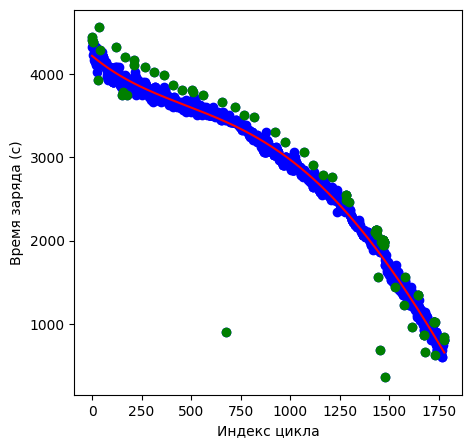

82

In [ ]:
data_outliers_1 = remove_outliers(data, 'Charge_Time_s', 4, 150)
len(data_outliers_1.index)

In [ ]:
data_filter_1 = data[~data.index.isin(data_outliers_1.index)].reset_index(drop=True)
print(data.shape)
print(data_filter_1.shape)

(1780, 15)
(1698, 15)


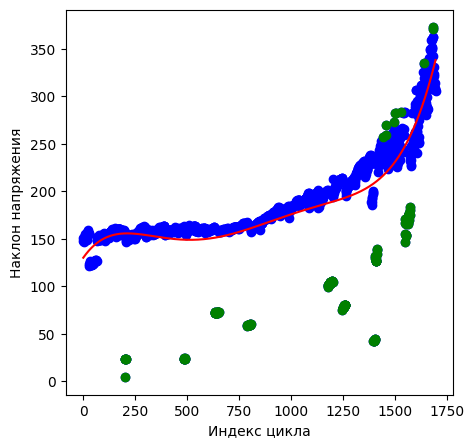

144

In [ ]:
data_outliers_2 = remove_outliers(data_filter_1, 'Slope', 5, 40)
len(data_outliers_2.index)

In [ ]:
data_filter_2 = data_filter_1[~data_filter_1.index.isin(data_outliers_2.index)].reset_index(drop=True)
print(data_filter_1.shape)
print(data_filter_2.shape)

(1698, 15)
(1554, 15)


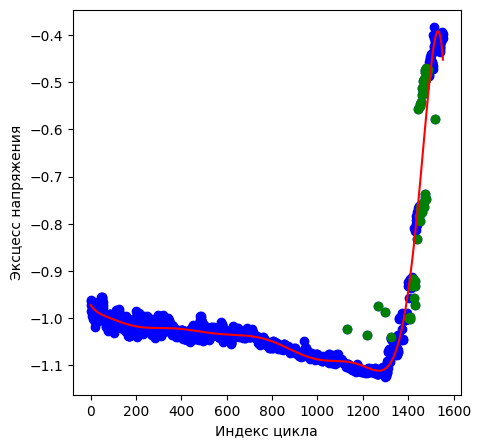

60

In [ ]:
data_outliers_3 = remove_outliers(data_filter_2, 'Kurtosis', 11, 0.05)
len(data_outliers_3.index)

In [ ]:
data_filter_3 = data_filter_2[~data_filter_2.index.isin(data_outliers_3.index)].reset_index(drop=True)
print(data_filter_2.shape)
print(data_filter_3.shape)

(1554, 15)
(1494, 15)


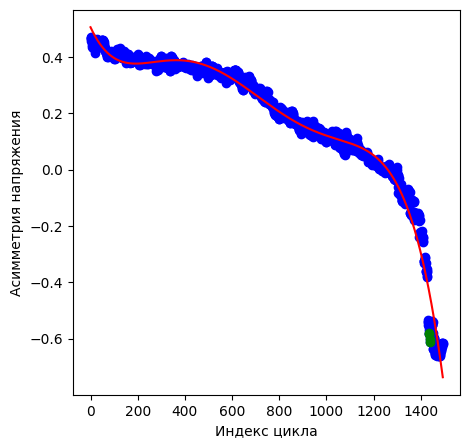

4

In [ ]:
data_outliers_4 = remove_outliers(data_filter_3, 'Skewness', 5, 0.15)
len(data_outliers_4.index)

In [ ]:
data_filter_4 = data_filter_3[~data_filter_3.index.isin(data_outliers_4.index)].reset_index(drop=True)
print(data_filter_3.shape)
print(data_filter_4.shape)

(1494, 15)
(1490, 15)


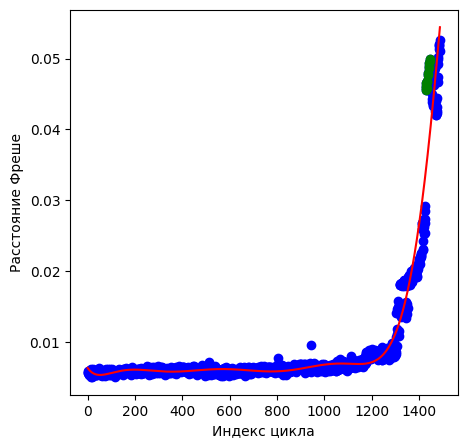

14

In [ ]:
data_outliers_5 = remove_outliers(data_filter_4, 'Frechet_distance', 9, 0.01)
len(data_outliers_5.index)

In [ ]:
data_filter_5 = data_filter_4[~data_filter_4.index.isin(data_outliers_5.index)].reset_index(drop=True)
print(data_filter_4.shape)
print(data_filter_5.shape)

(1490, 15)
(1476, 15)


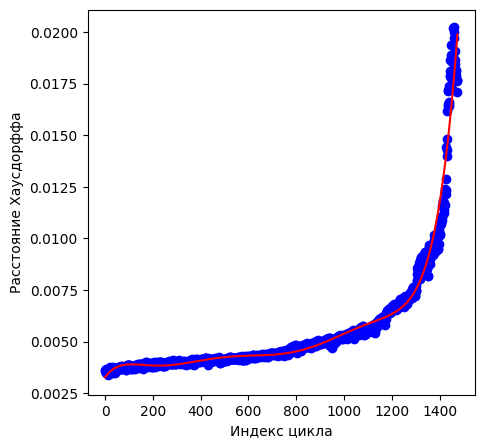

0

In [ ]:
data_outliers_6 = remove_outliers(data_filter_5, 'Hausdorff_distance', 7, 0.01)
len(data_outliers_6.index)

In [ ]:
data_filter_6 = data_filter_5[~data_filter_5.index.isin(data_outliers_6.index)].reset_index(drop=True)
print(data_filter_5.shape)
print(data_filter_6.shape)

(1476, 15)
(1476, 15)


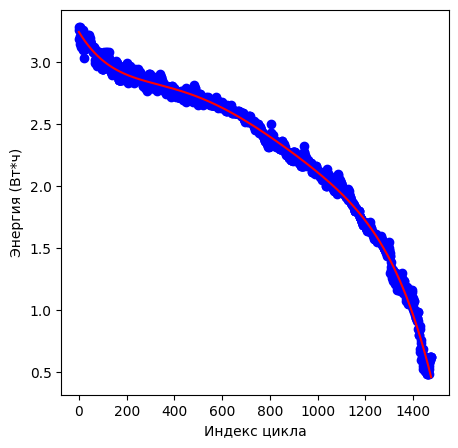

0

In [ ]:
data_outliers_7 = remove_outliers(data_filter_6, 'Energy_Wh', 5, 0.2)
len(data_outliers_7.index)

In [ ]:
data_filter_7 = data_filter_6[~data_filter_6.index.isin(data_outliers_7.index)].reset_index(drop=True)
print(data_filter_6.shape)
print(data_filter_7.shape)

(1476, 15)
(1476, 15)


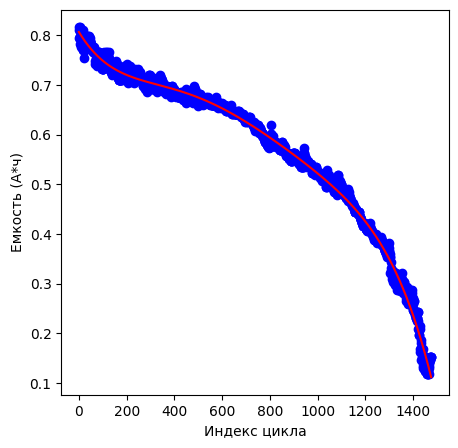

0

In [ ]:
data_outliers_8 = remove_outliers(data_filter_7, 'Capacity_Ah', 5, 0.15)
len(data_outliers_8.index)

In [ ]:
data_filter_8 = data_filter_7[~data_filter_7.index.isin(data_outliers_8.index)].reset_index(drop=True)
print(data_filter_7.shape)
print(data_filter_8.shape)

(1476, 15)
(1476, 15)


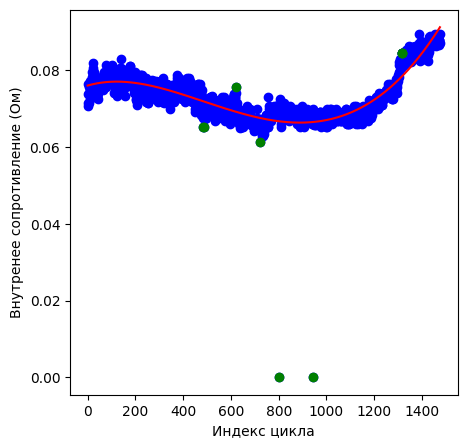

9


In [ ]:
data_outliers_9 = remove_outliers(data_filter_8, 'Internal_Resistance(Ohm)', 5, 0.006)
print(len(data_outliers_9.index))

In [ ]:
data_filter_9 = data_filter_8[~data_filter_8.index.isin(data_outliers_9.index)].reset_index(drop=True)
print(data_filter_8.shape)
print(data_filter_9.shape)

(1476, 15)
(1467, 15)


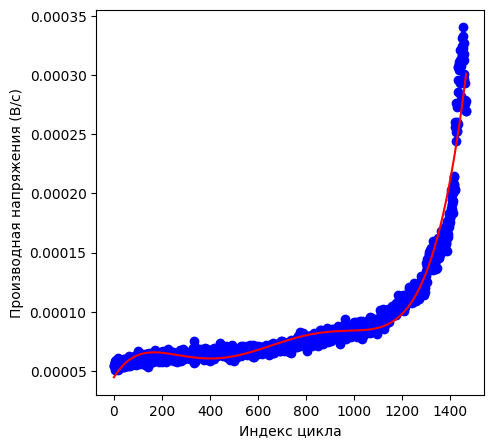

0

In [ ]:
data_outliers_10 = remove_outliers(data_filter_9, 'dV/dt(V/s)', 5, 0.0002)
len(data_outliers_10.index)

In [ ]:
data_filter_10 = data_filter_9[~data_filter_9.index.isin(data_outliers_10.index)].reset_index(drop=True)
print(data_filter_9.shape)
print(data_filter_10.shape)

(1467, 15)
(1467, 15)


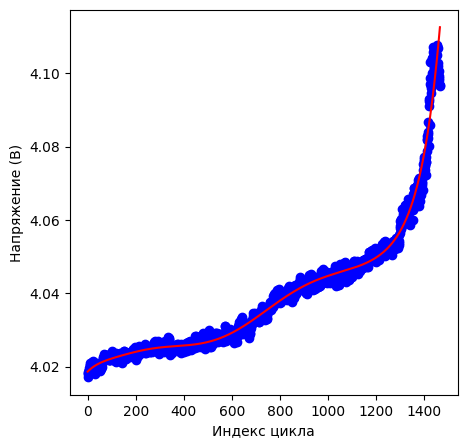

0

In [ ]:
data_outliers_11 = remove_outliers(data_filter_10, 'Voltage(V)', 9, 0.03)
len(data_outliers_11.index)

In [ ]:
data_filter_11 = data_filter_10[~data_filter_10.index.isin(data_outliers_11.index)].reset_index(drop=True)
print(data_filter_10.shape)
print(data_filter_11.shape)

(1467, 15)
(1467, 15)


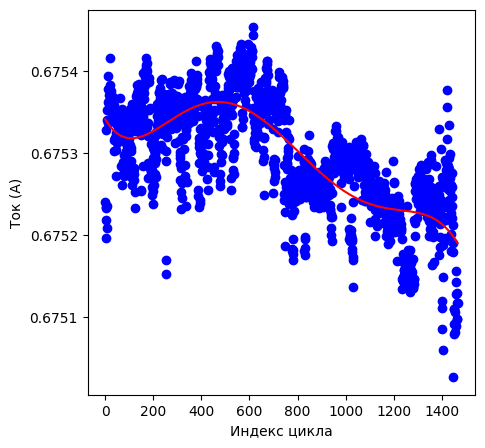

0

In [ ]:
data_outliers_12 = remove_outliers(data_filter_11, 'Current(A)', 5, 0.0002)
len(data_outliers_12.index)

In [ ]:
data_filter_12 = data_filter_11[~data_filter_11.index.isin(data_outliers_12.index)].reset_index(drop=True)
print(data_filter_11.shape)
print(data_filter_12.shape)

(1467, 15)
(1467, 15)


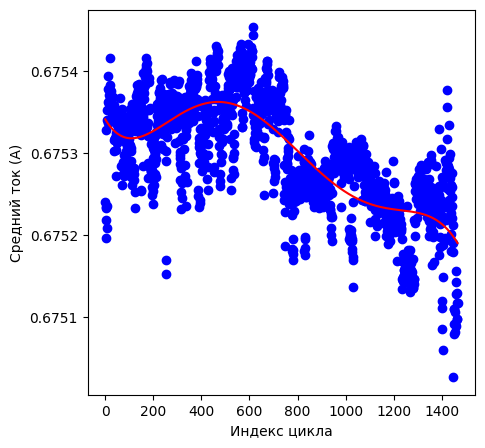

0

In [ ]:
data_outliers_13 = remove_outliers(data_filter_12, 'Signal_mean', 5, 0.02)
len(data_outliers_13.index)

In [ ]:
data_filter_13 = data_filter_12[~data_filter_12.index.isin(data_outliers_13.index)].reset_index(drop=True)
print(data_filter_12.shape)
print(data_filter_13.shape)

(1467, 15)
(1467, 15)


In [ ]:
data_filtered_save_name = os.path.join('/content/drive/MyDrive/Battery_project/filtered_data', filename_for_save + "_filtered.csv")
data_filter_13.to_csv(data_filtered_save_name, index=False)